In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Code for Data & Category Analysis, and Product Distribution Analysis

--- Loading Data: /content/drive/MyDrive/Colab Notebooks/reduced_icecat_data_train_transformed.json ---
--- Standardizing Category Levels ---
--- Performing Distribution Analysis ---

[REPORT FOR ROLE D - EVALUATION]
Total Products Analyzed: 31766
Unique Level 1 (Roots): 1
Unique Level 3 (Standardized Leaves): 220
------------------------------
Top Level 3 Categories (Most Populated):
Level_3
Notebook Parts & Accessories     6401
Notebooks                        5442
Warranty & Support Extensions    1814
Data Storage Devices             1584
Software Licenses/Upgrades       1437
PCs/Workstations                 1425
Printing Supplies                1361
System Components                1340
Chassis Components                539
TVs                               530
Name: count, dtype: int64


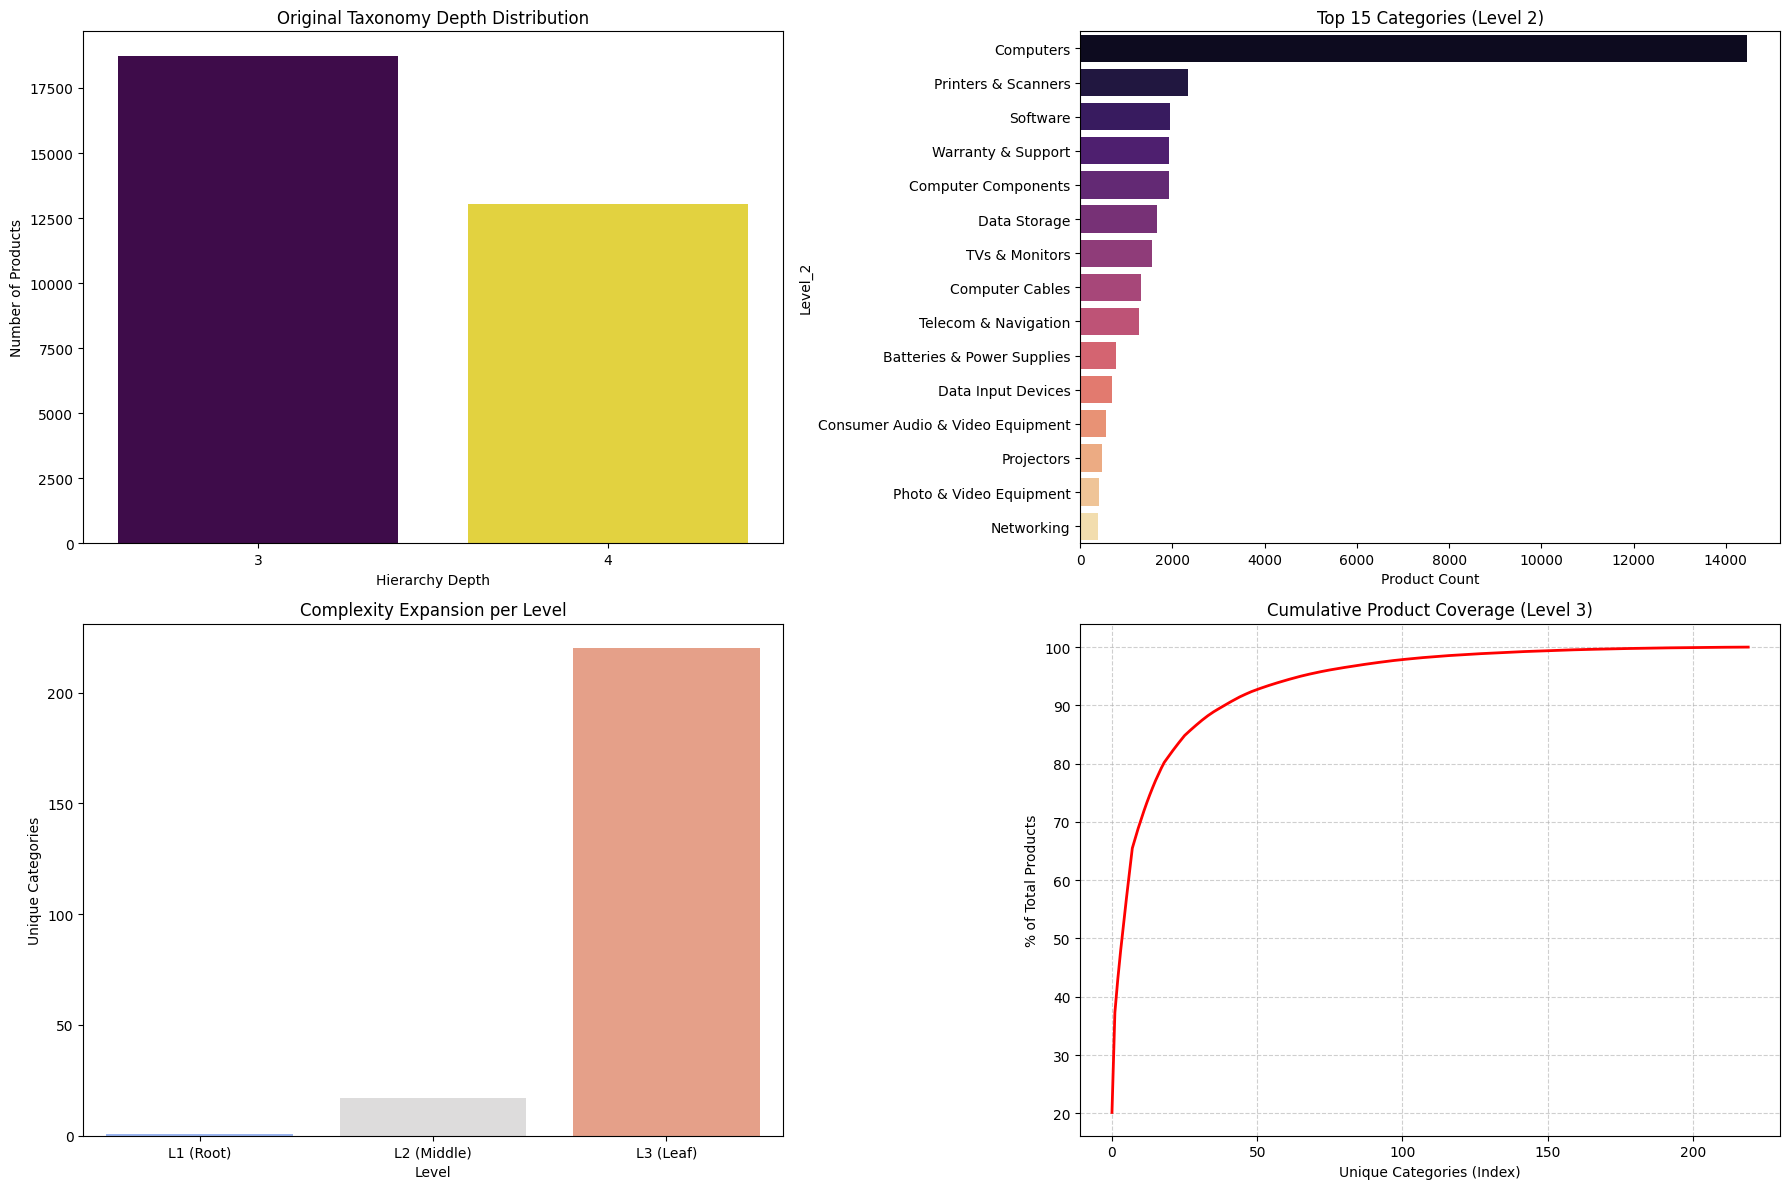

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def perform_category_analysis(file_path):

    # 1. Load Dataset
    print(f"--- Loading Data: {file_path} ---")
    try:
        with open(file_path, 'r') as f:
            data = json.load(f)
        df = pd.DataFrame(data)
    except Exception as e:
        return f"Error loading JSON: {e}"

    # Extract and Standardize Categories (3 Levels)
    # Field 'pathlist_names' looks like 'A > B > C > D'

    def standardize_levels(path_str):
        if pd.isna(path_str) or path_str == "":
            return ["Unknown", "Unknown", "Unknown"]

        # Split and clean
        levels = [l.strip() for l in path_str.split('>')]

        # Standardize to exactly 3
        if len(levels) >= 3:
            return levels[:3]
        else:
            # Padding: Repeat the last level to reach 3
            last_val = levels[-1]
            while len(levels) < 3:
                levels.append(f"{last_val} (Padded)")
            return levels

    print("Standardizing Category Levels\n")
    # Apply standardization
    standardized_data = df['pathlist_names'].apply(standardize_levels)

    # Create separate columns for the levels
    df['Level_1'] = standardized_data.apply(lambda x: x[0])
    df['Level_2'] = standardized_data.apply(lambda x: x[1])
    df['Level_3'] = standardized_data.apply(lambda x: x[2])

    # Product Distribution Analysis
    print("Performing Distribution Analysis\n")

    # Counts across standardized levels
    l1_counts = df['Level_1'].value_counts()
    l2_counts = df['Level_2'].value_counts()
    l3_counts = df['Level_3'].value_counts()

    # Original depth analysis (to see what we simplified)
    df['original_depth'] = df['pathlist_names'].str.split('>').str.len()
    depth_dist = df['original_depth'].value_counts().sort_index()

    # Visualization
    plt.style.use('seaborn-v0_8-muted')
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # Plot 1: Original Depth Distribution
    sns.barplot(x=depth_dist.index, y=depth_dist.values, ax=axes[0, 0], hue=depth_dist.index, palette='viridis', legend=False)
    axes[0, 0].set_title('Original Taxonomy Depth Distribution')
    axes[0, 0].set_xlabel('Hierarchy Depth')
    axes[0, 0].set_ylabel('Number of Products')

    # Plot 2: Top Level 2 Categories (Showing imbalance)
    top_l2 = l2_counts.head(15)
    sns.barplot(x=top_l2.values, y=top_l2.index, ax=axes[0, 1], hue=top_l2.index, palette='magma', legend=False)
    axes[0, 1].set_title('Top 15 Categories (Level 2)')
    axes[0, 1].set_xlabel('Product Count')

    # Plot 3: Distribution across Levels (Scale check)
    level_summary = pd.DataFrame({
        'Level': ['L1 (Root)', 'L2 (Middle)', 'L3 (Leaf)'],
        'Unique Categories': [df['Level_1'].nunique(), df['Level_2'].nunique(), df['Level_3'].nunique()]
    })
    sns.barplot(data=level_summary, x='Level', y='Unique Categories', ax=axes[1, 0], hue='Level', palette='coolwarm', legend=False)
    axes[1, 0].set_title('Complexity Expansion per Level')

    # Plot 4: Product Concentration (Pareto-style)
    # Showing how few categories hold the most products
    axes[1, 1].plot(range(len(l3_counts)), l3_counts.cumsum() / l3_counts.sum() * 100, color='red', linewidth=2)
    axes[1, 1].set_title('Cumulative Product Coverage (Level 3)')
    axes[1, 1].set_xlabel('Unique Categories (Index)')
    axes[1, 1].set_ylabel('% of Total Products')
    axes[1, 1].grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.savefig('category_analysis_report.png')


    print(f"Total Products Analyzed: {len(df)}")
    print(f"Unique Level 1 (Roots): {df['Level_1'].nunique()}")
    print(f"Unique Level 3 (Standardized Leaves): {df['Level_3'].nunique()}")
    print("-" * 30)
    print("Top Level 3 Categories (Most Populated):")
    print(l3_counts.head(10))

    return df

# Execute Analysis
dataset_path = '/content/drive/MyDrive/Colab Notebooks/reduced_icecat_data_train_transformed.json'
analyzed_df = perform_category_analysis(dataset_path)

In [4]:
!pip install -U sentence-transformers scikit-learn matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 78.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 5.1.2
    Uninstalling sentence-transformers-5.1.2:
      Successfully uninstalled sentence-transformers-5.1.2


Machine Learning & Categorization Plan

--- 1. Robust Feature Fusion (Handling Lists & Strings) ---
--- 2. Generating Embeddings on CUDA ---


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/249 [00:00<?, ?it/s]

--- 3. PCA Reduction (50 Components) ---
--- 4. Running K-Means ---

--- 5. Final Evaluation Metrics ---
Adjusted Rand Index (ARI): 0.1299
Normalized Mutual Info (NMI): 0.6670


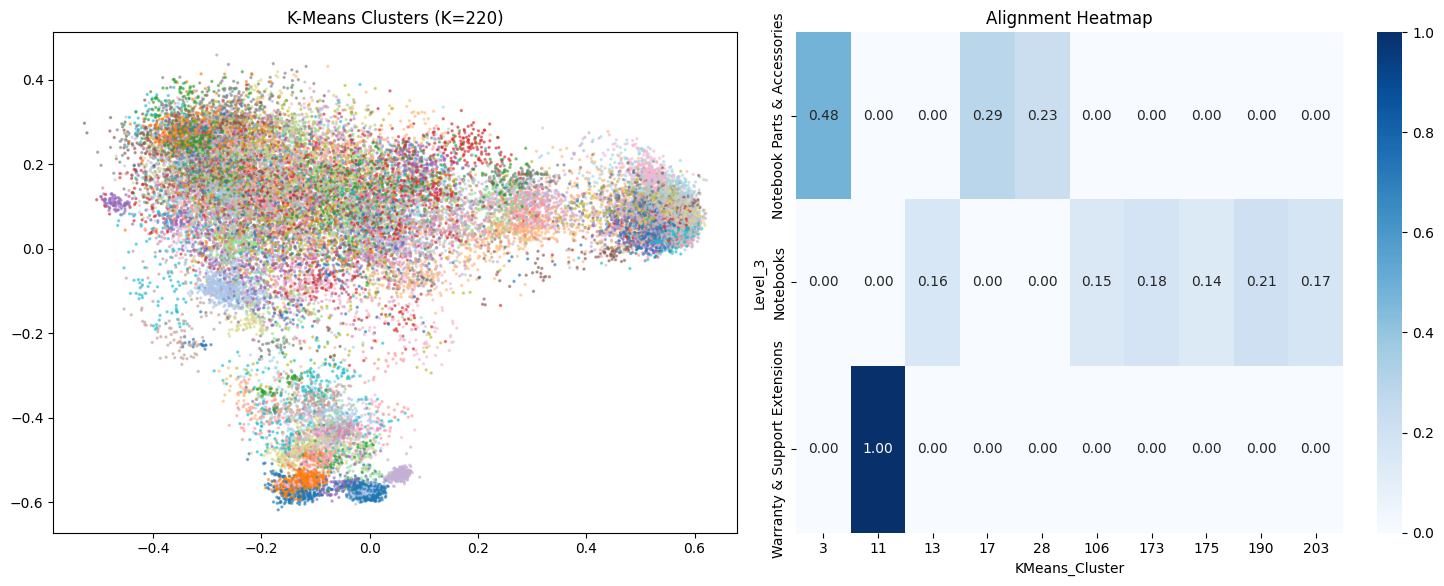

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import torch

def safe_join_text(x):

    if isinstance(x, list):
        # Join list elements with space, ignore empty items
        return " ".join([str(i) for i in x if i])
    if pd.isna(x):
        return ""
    return str(x)

def execute_ml_and_alignment_pipeline(df):
    """
    Combined ML Pipeline with Type-Safe Feature Fusion.
    """
    print("Robust Feature Fusion (Handling Lists & Strings)\n")

    # Apply safe_join to both columns to prevent TypeError
    clean_titles = df['Title'].apply(safe_join_text)
    clean_descs = df['Description'].apply(safe_join_text)

    # Concatenate safely
    df['ml_input_text'] = clean_titles + " [SEP] " + clean_descs
    product_texts = df['ml_input_text'].tolist()

    # Part B: GPU Embedding
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Generating Embeddings on {device.upper()}\n")
    model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

    # We use a larger batch size for the T4 GPU to maximize throughput
    embeddings = model.encode(product_texts, show_progress_bar=True, batch_size=128)

    # Part C: Dimensionality Reduction
    print("3. PCA Reduction (50 Components)\n")
    pca = PCA(n_components=50, random_state=42)
    reduced_vectors = pca.fit_transform(embeddings)

    # Part D: Clustering
    print("4. Running K-Means\n")
    n_clusters = df['Level_3'].nunique() if 'Level_3' in df.columns else 20
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=42)
    df['KMeans_Cluster'] = kmeans.fit_predict(reduced_vectors)

    # DBSCAN for outlier detection (scaled vectors)
    scaler = StandardScaler()
    scaled_vectors = scaler.fit_transform(reduced_vectors)
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_vectors)

    # Part E: Alignment Metrics
    print("\n5. Final Evaluation Metrics\n")
    valid_mask = df['Level_3'].notna()
    ari = adjusted_rand_score(df.loc[valid_mask, 'Level_3'], df.loc[valid_mask, 'KMeans_Cluster'])
    nmi = normalized_mutual_info_score(df.loc[valid_mask, 'Level_3'], df.loc[valid_mask, 'KMeans_Cluster'])

    print(f"Adjusted Rand Index (ARI): {ari:.4f}")
    print(f"Normalized Mutual Info (NMI): {nmi:.4f}")

    # Part F: Visualization
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=df['KMeans_Cluster'], cmap='tab20', s=2, alpha=0.5)
    plt.title(f'K-Means Clusters (K={n_clusters})')

    plt.subplot(1, 2, 2)
    # Filter heatmap to show most significant category-cluster intersections
    top_cats = df['Level_3'].value_counts().nlargest(10).index
    top_clasts = df['KMeans_Cluster'].value_counts().nlargest(10).index
    subset = df[df['Level_3'].isin(top_cats) & df['KMeans_Cluster'].isin(top_clasts)]
    ct = pd.crosstab(subset['Level_3'], subset['KMeans_Cluster'], normalize='index')
    sns.heatmap(ct, annot=True, cmap="Blues", fmt=".2f")
    plt.title("Alignment Heatmap")

    plt.tight_layout()
    plt.show()

    return df


final_results_df = execute_ml_and_alignment_pipeline(analyzed_df)